In [1]:
#Import Library
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Train and Test datasets
#Identify feature and response variable(s) and values must be numeric and numpy arrays
train=pd.read_csv('train_ctrUa4K.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
train_y=train['Loan_Status']
train_x=train.drop(["Loan_Status"],axis=1)

In [5]:
test=pd.read_csv('test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
dataset = [train,test]
dataset

[      Loan_ID  Gender Married Dependents     Education Self_Employed  \
 0    LP001002    Male      No          0      Graduate            No   
 1    LP001003    Male     Yes          1      Graduate            No   
 2    LP001005    Male     Yes          0      Graduate           Yes   
 3    LP001006    Male     Yes          0  Not Graduate            No   
 4    LP001008    Male      No          0      Graduate            No   
 ..        ...     ...     ...        ...           ...           ...   
 609  LP002978  Female      No          0      Graduate            No   
 610  LP002979    Male     Yes         3+      Graduate            No   
 611  LP002983    Male     Yes          1      Graduate            No   
 612  LP002984    Male     Yes          2      Graduate            No   
 613  LP002990  Female      No          0      Graduate           Yes   
 
      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 0               5849                0.0        

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
#mean
#median
#mode

In [10]:
for data in dataset:
    data["Gender"].ffill(inplace=True)
    data["Married"].ffill(inplace=True)
    data["Dependents"].ffill(inplace=True)
    data["Education"].ffill(inplace=True)
    data["Self_Employed"].bfill(inplace=True)
    data["Property_Area"].ffill(inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
#LoanAmount Loan_Amount_Term Credit_History
for data in dataset:
    data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)
    data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].median(),inplace=True)
    data["Credit_History"].ffill(inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
import seaborn as sns

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

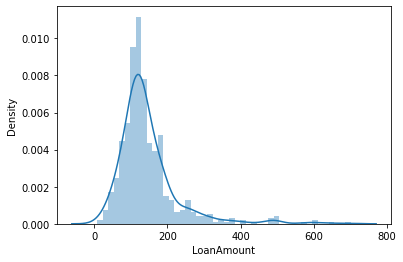

In [15]:
sns.distplot(train["LoanAmount"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

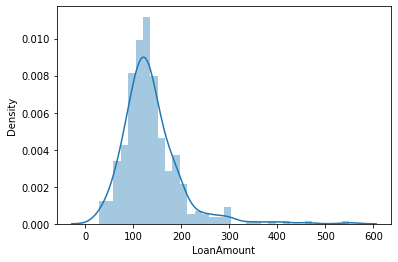

In [16]:
sns.distplot(test["LoanAmount"])

In [17]:
train.drop(["CoapplicantIncome"],inplace=True,axis=1)
test.drop(["CoapplicantIncome"],inplace=True,axis=1)

<AxesSubplot:>

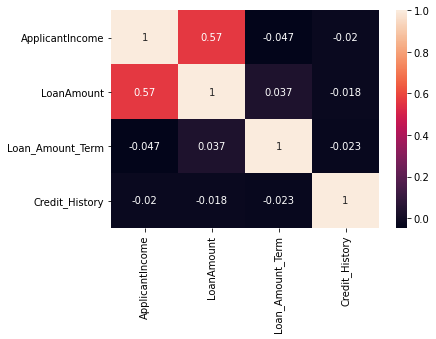

In [18]:
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:>

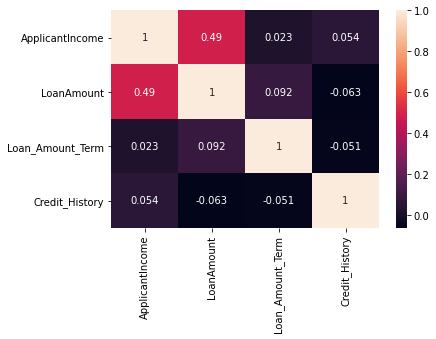

In [19]:
sns.heatmap(test.corr(),annot=True)

In [20]:
col = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for data in dataset:
    for c in col:
        data[c] = le.fit_transform(data[c])

In [22]:
train["Loan_Status"] = le.fit_transform(train["Loan_Status"])

In [23]:
train["Education"].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [24]:
train.drop(["Loan_ID"],inplace=True,axis=1)
test.drop(["Loan_ID"],inplace=True,axis=1)

In [25]:
x = train.iloc[:,0:10].values

In [26]:
y = train.iloc[:,10].values

In [27]:
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)
support.fit(x,y)

C:\logs\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(random_state=20)

In [28]:
y_test_pred = support.predict(test.values)

In [29]:
y_train_pred = support.predict(x)

In [30]:
import pandas
result = pd.DataFrame({"Actual values":y,"Predicted values":y_train_pred})
result.head(10)

,Actual values,Predicted values
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,1
8,1,1
9,0,1


In [31]:
acc_log = round(support.score(x,y)*100,2)
print(acc_log,"%")

68.73 %


In [32]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_score(y_train_pred,y)

0.6872964169381107

In [33]:
svc = svm.SVC()
svc.fit(x,y)

SVC()

In [34]:
svc_test_pred = svc.predict(test.values)

In [35]:
svc_train_pred = svc.predict(x)

In [36]:
result = pd.DataFrame({"Actual values":y,"Predicted values":svc_train_pred})
result.head(10)

,Actual values,Predicted values
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,1
8,1,1
9,0,1


In [37]:
accuracy_score(svc_train_pred,y)

0.6889250814332247

In [38]:
result.to_csv('raw_data.csv', index=False)